In [3]:
#https://github.com/DariusTheGeek/Flood-Prediction-in-Malawi--Zindi-Competition/blob/master/Malawi_Flood_Prediction__starter_code__by_DariusMoruri.ipynb

# Flood Prediction

## Import Data and libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

#Display all columns
pd.set_option('display.max_columns', 999)

In [5]:
all_df = pd.read_csv('Train.csv')
all_df.head()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,precip 2019-01-20 - 2019-01-27,precip 2019-01-27 - 2019-02-03,precip 2019-02-03 - 2019-02-10,precip 2019-02-10 - 2019-02-17,precip 2019-02-17 - 2019-02-24,precip 2019-02-24 - 2019-03-03,precip 2019-03-03 - 2019-03-10,precip 2019-03-10 - 2019-03-17,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41


## Data description

In [6]:
#Visualising number of rows & columns
all_df.shape

(16466, 40)

In [7]:
#Checking Na values
all_df.isna().sum()

X                                 0
Y                                 0
target_2015                       0
elevation                         0
precip 2014-11-16 - 2014-11-23    0
precip 2014-11-23 - 2014-11-30    0
precip 2014-11-30 - 2014-12-07    0
precip 2014-12-07 - 2014-12-14    0
precip 2014-12-14 - 2014-12-21    0
precip 2014-12-21 - 2014-12-28    0
precip 2014-12-28 - 2015-01-04    0
precip 2015-01-04 - 2015-01-11    0
precip 2015-01-11 - 2015-01-18    0
precip 2015-01-18 - 2015-01-25    0
precip 2015-01-25 - 2015-02-01    0
precip 2015-02-01 - 2015-02-08    0
precip 2015-02-08 - 2015-02-15    0
precip 2015-02-15 - 2015-02-22    0
precip 2015-02-22 - 2015-03-01    0
precip 2015-03-01 - 2015-03-08    0
precip 2015-03-08 - 2015-03-15    0
precip 2019-01-20 - 2019-01-27    0
precip 2019-01-27 - 2019-02-03    0
precip 2019-02-03 - 2019-02-10    0
precip 2019-02-10 - 2019-02-17    0
precip 2019-02-17 - 2019-02-24    0
precip 2019-02-24 - 2019-03-03    0
precip 2019-03-03 - 2019-03-

In [8]:
#Checking Unique values
all_df.nunique()

X                                   161
Y                                   144
target_2015                        2319
elevation                         15925
precip 2014-11-16 - 2014-11-23      204
precip 2014-11-23 - 2014-11-30       90
precip 2014-11-30 - 2014-12-07       78
precip 2014-12-07 - 2014-12-14      331
precip 2014-12-14 - 2014-12-21      331
precip 2014-12-21 - 2014-12-28      331
precip 2014-12-28 - 2015-01-04      331
precip 2015-01-04 - 2015-01-11      331
precip 2015-01-11 - 2015-01-18      331
precip 2015-01-18 - 2015-01-25      272
precip 2015-01-25 - 2015-02-01      331
precip 2015-02-01 - 2015-02-08      331
precip 2015-02-08 - 2015-02-15      331
precip 2015-02-15 - 2015-02-22      331
precip 2015-02-22 - 2015-03-01      331
precip 2015-03-01 - 2015-03-08      331
precip 2015-03-08 - 2015-03-15       76
precip 2019-01-20 - 2019-01-27      331
precip 2019-01-27 - 2019-02-03      304
precip 2019-02-03 - 2019-02-10      331
precip 2019-02-10 - 2019-02-17      331


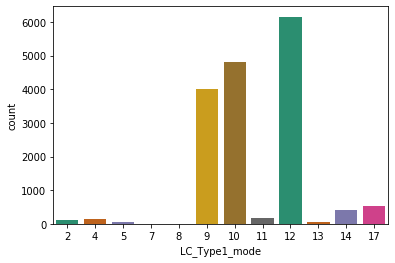

In [9]:
#Visualising most Dominant Land Cover Type
m = sns.countplot(data=all_df, x = 'LC_Type1_mode', palette='Dark2', orient = 'v')

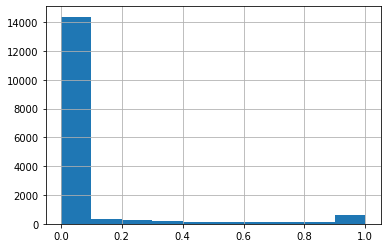

In [10]:
#Visualising flooding % repartition
all_df.target_2015.hist()

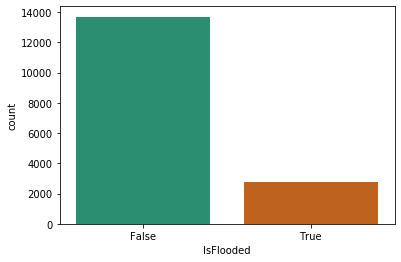

In [11]:
#Counting number of rectangle that have been flooded in 2015
all_df['IsFlooded'] = all_df['target_2015'] > 0

m = sns.countplot(data=all_df, x = 'IsFlooded', palette='Dark2', orient = 'v')

In [12]:
#Getting flooding % repartition
OnlyFlooded = all_df[all_df['IsFlooded'] == True]
OnlyFlooded.target_2015.describe()

count    2765.000000
mean        0.456216
std         0.372043
min         0.000095
25%         0.102196
50%         0.352908
75%         0.867936
max         1.000000
Name: target_2015, dtype: float64

(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

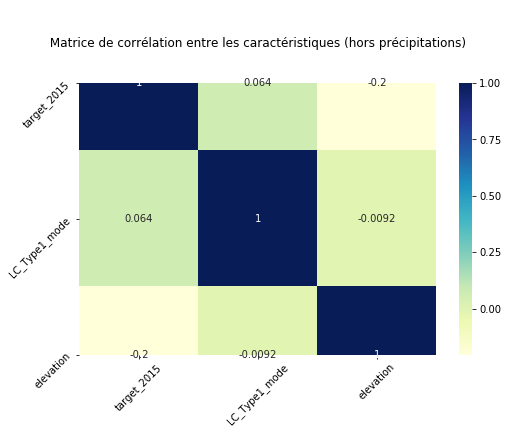

In [13]:
#Visualizing correlation in other features than precipitations
reducted_df = all_df[['target_2015','LC_Type1_mode','elevation']]

plt.figure(figsize=(8,5))
sns.heatmap(reducted_df.corr(), annot=True, cmap="YlGnBu")
plt.title("\n\n Matrice de corrélation entre les caractéristiques (hors précipitations) \n\n")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [14]:
#Split Test(2019) and Train (2015) Dataset

list_2019_col = []

for col in all_df.columns : 
    if '2019' in col: list_2019_col.append(col)
        
train_df = all_df.drop(list_2019_col, axis=1)

list_2014_15_col = []

for col in all_df.columns : 
    if 'precip 2015' in col: list_2014_15_col.append(col)
        
for col in all_df.columns : 
    if 'precip 2014' in col: list_2014_15_col.append(col)
        
test_df = all_df.drop(list_2014_15_col, axis=1)

In [15]:
# Data retrieval and preparation.
y = train_df['target_2015']
print(y.shape)

train_df_dropped = train_df.drop(train_df[['target_2015','Square_ID','IsFlooded']], axis=1)
columns = list(train_df_dropped.columns)

X = train_df[columns]
X.shape

(16466,)


(16466, 21)

In [16]:
#Divivde Dataset in training/test with sklearn function
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision tree

In [17]:
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

clf = tree.DecisionTreeRegressor(
    criterion='mse',
    splitter='best',
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None
)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)*100)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)*100)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)*100))

Mean Absolute Error: 3.7351409381691973
Mean Squared Error: 1.473682129380621
Root Mean Squared Error: 1.21395310015693


In [18]:
test_df_dropped = test_df.drop(test_df[['target_2015','Square_ID','IsFlooded']], axis=1)


In [19]:
y_pred_19 = clf.predict(test_df_dropped)
print([i for i in y_pred_19 if i > 0])

[0.9285262292, 0.9285262292, 0.3844206796, 0.3844206796, 0.3844206796, 0.3844206796, 0.3844206796, 0.3844206796, 0.1889454868, 0.9564006834000001, 0.3844206796, 0.3844206796, 0.3844206796, 0.3844206796, 0.3844206796, 0.3844206796, 0.3844206796, 0.3844206796, 0.1470606847, 0.6276222117, 0.7159044153, 0.7159044153, 0.9008732519, 0.26209384, 0.0918812884, 0.1731000443, 0.45804594060000003, 0.26027744350000004, 0.9284742222, 0.4165400684, 0.0080073427, 0.0080073427, 0.0080073427, 0.2250997277, 0.0080073427, 1.0, 0.44305841380000005, 0.44305841380000005, 0.1824279432, 0.2572929191, 0.44305841380000005, 0.44305841380000005, 0.44305841380000005, 0.38854249090000004, 0.38854249090000004, 0.0331381548, 0.2572929191, 0.1824279432, 0.7059958867, 0.9128383726, 0.315319876, 0.2250997277, 0.44305841380000005, 0.44305841380000005, 0.2737371819, 0.2737371819, 0.2737371819, 0.44305841380000005, 1.0, 0.0639954425, 0.1943389058, 0.44305841380000005, 1.0, 0.49382833270000004, 0.2737371819, 0.5228826434, 0

In [20]:
s = {'Square_ID':test_df['Square_ID'],'target_2019':y_pred_19}

Sub_df = pd.DataFrame(data=s)
Sub_df .to_csv('submission.csv', index = False, header=True)

In [21]:
d = {'True':y_test,'Predicted':y_pred}

y_df = pd.DataFrame(data=d)
y_df[y_df['True']>0]

,True,Predicted
14174,0.331413,1.000000
7584,0.983516,0.875146
9572,0.998385,1.000000
13381,0.686968,0.463290
4606,0.148611,0.426826
...,...,...
9389,0.042284,0.122463
14016,0.773611,1.000000
8426,0.416287,0.233869
14760,0.290644,0.000012


In [22]:
y_df['Error'] = abs((y_df['Predicted']/y_df['True'])*100-100)

In [23]:
y_df[y_df['True']>0]

,True,Predicted,Error
14174,0.331413,1.000000,201.738134
7584,0.983516,0.875146,11.018578
9572,0.998385,1.000000,0.161735
13381,0.686968,0.463290,32.560253
4606,0.148611,0.426826,187.210310
...,...,...,...
9389,0.042284,0.122463,189.621789
14016,0.773611,1.000000,29.264002
8426,0.416287,0.233869,43.820127
14760,0.290644,0.000012,99.995839


In [24]:
y_df[y_df['True']>0].mean()

True           0.455772
Predicted      0.397503
Error        283.762345
dtype: float64

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
regr = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=15,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=42,
                      verbose=0, warm_start=False)
regr = regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)*100)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)*100)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)*100))

Mean Absolute Error: 3.5122686666134912
Mean Squared Error: 0.8717816957902929
Root Mean Squared Error: 0.9336925060159221


In [27]:
#Create Submission CSV file
y_pred_19 = regr.predict(test_df_dropped)
s = {'Square_ID':test_df['Square_ID'],'target_2019':y_pred_19}

Sub_df = pd.DataFrame(data=s)
Sub_df.to_csv('submission_forest.csv', index = False, header=True)

In [ ]:
#Sample code to use GridSearch
# parameters = {
#       "booster" : ['gbtree', 'gblinear','dart']
# }

# model = GridSearchCV(xgb_model,
#                    parameters)
# model.fit(X,y)
# print(model.best_score_)
# print(model.best_params_)

## XGBoost

In [41]:
from xgboost import XGBRegressor
import xgboost as xgb

boost_params = {'eval_metric': 'rmse'}

xgb_model = xgb.XGBRegressor(
    #booster='dart',
    eta=0.2,
    max_depth= 15,
    learning_rate=0.1,
    n_estimators=200,
    random_state=42,
    objective = 'reg:squarederror',
    sampling_method = 'gradient_based',
    colsample_bytree= 0.7,
    #gamma = 0.1,
    #colsample_bytree=0.2,
    min_child_weight=3,
    #max_delta_step=2,
    subsample=0.8,
    **boost_params
)

clf = xgb_model.fit(x_train, y_train)
y_pred = clf.predict(x_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)*100)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)*100)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)*100))


/home/h/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Mean Absolute Error: 3.5365729205505154
Mean Squared Error: 0.8216494515443173
Root Mean Squared Error: 0.9064488135268959


In [29]:
#Renaming columns name to avoid XGboost mismatch features error
test_df_dropped.columns = x_train.columns

In [30]:
y_pred_19 = clf.predict(test_df_dropped)

In [31]:
#Create Submission CSV file
s = {'Square_ID':test_df['Square_ID'],'target_2019':y_pred_19}

Sub_df = pd.DataFrame(data=s)
Sub_df.to_csv('submission_xgboost.csv', index = False, header=True)

## Catboost

In [32]:
!pip install catboost
from catboost import Pool, CatBoostRegressor
train_pool = Pool(x_train, y_train) 
cbm0 = CatBoostRegressor(rsm=0.8, depth=7, learning_rate=0.1, 
eval_metric='RMSE')
cbm0.fit(train_pool)
test_pool = Pool(x_test)
predict_cat = cbm0.predict(test_pool)
acc_cat = round(cbm0.score(x_train, y_train)*100,2)
msecat = mean_squared_error(y_test,predict_cat)
rmsecat = np.sqrt(msecat)
print(acc_cat)
print(msecat)
print(rmsecat)

0:	learn: 0.2180808	total: 60ms	remaining: 59.9s
1:	learn: 0.2073250	total: 67.6ms	remaining: 33.7s
2:	learn: 0.1977594	total: 78.2ms	remaining: 26s
3:	learn: 0.1887474	total: 87.6ms	remaining: 21.8s
4:	learn: 0.1813588	total: 96.1ms	remaining: 19.1s
5:	learn: 0.1753648	total: 102ms	remaining: 16.9s
6:	learn: 0.1694404	total: 109ms	remaining: 15.4s
7:	learn: 0.1649683	total: 116ms	remaining: 14.3s
8:	learn: 0.1610283	total: 123ms	remaining: 13.5s
9:	learn: 0.1568682	total: 130ms	remaining: 12.8s
10:	learn: 0.1538093	total: 136ms	remaining: 12.2s
11:	learn: 0.1515820	total: 143ms	remaining: 11.8s
12:	learn: 0.1494232	total: 149ms	remaining: 11.3s
13:	learn: 0.1469944	total: 155ms	remaining: 10.9s
14:	learn: 0.1445778	total: 162ms	remaining: 10.6s
15:	learn: 0.1429186	total: 168ms	remaining: 10.3s
16:	learn: 0.1413814	total: 174ms	remaining: 10.1s
17:	learn: 0.1401380	total: 181ms	remaining: 9.85s
18:	learn: 0.1389200	total: 187ms	remaining: 9.67s
19:	learn: 0.1378184	total: 193ms	remain

147:	learn: 0.0979539	total: 1.07s	remaining: 6.19s
148:	learn: 0.0978725	total: 1.08s	remaining: 6.19s
149:	learn: 0.0976502	total: 1.1s	remaining: 6.21s
150:	learn: 0.0974804	total: 1.11s	remaining: 6.22s
151:	learn: 0.0973441	total: 1.11s	remaining: 6.2s
152:	learn: 0.0972699	total: 1.12s	remaining: 6.19s
153:	learn: 0.0971741	total: 1.12s	remaining: 6.18s
154:	learn: 0.0970723	total: 1.13s	remaining: 6.17s
155:	learn: 0.0968719	total: 1.14s	remaining: 6.16s
156:	learn: 0.0967079	total: 1.14s	remaining: 6.14s
157:	learn: 0.0965359	total: 1.15s	remaining: 6.13s
158:	learn: 0.0964066	total: 1.16s	remaining: 6.12s
159:	learn: 0.0962451	total: 1.16s	remaining: 6.11s
160:	learn: 0.0961389	total: 1.17s	remaining: 6.09s
161:	learn: 0.0960178	total: 1.18s	remaining: 6.08s
162:	learn: 0.0958509	total: 1.18s	remaining: 6.07s
163:	learn: 0.0957198	total: 1.19s	remaining: 6.06s
164:	learn: 0.0956595	total: 1.19s	remaining: 6.05s
165:	learn: 0.0955654	total: 1.2s	remaining: 6.03s
166:	learn: 0.0

323:	learn: 0.0828887	total: 2.27s	remaining: 4.74s
324:	learn: 0.0828138	total: 2.28s	remaining: 4.73s
325:	learn: 0.0827643	total: 2.29s	remaining: 4.73s
326:	learn: 0.0827336	total: 2.3s	remaining: 4.73s
327:	learn: 0.0826183	total: 2.31s	remaining: 4.72s
328:	learn: 0.0825906	total: 2.31s	remaining: 4.71s
329:	learn: 0.0825809	total: 2.32s	remaining: 4.7s
330:	learn: 0.0825511	total: 2.32s	remaining: 4.69s
331:	learn: 0.0824930	total: 2.33s	remaining: 4.69s
332:	learn: 0.0823648	total: 2.33s	remaining: 4.68s
333:	learn: 0.0823312	total: 2.34s	remaining: 4.67s
334:	learn: 0.0822946	total: 2.35s	remaining: 4.66s
335:	learn: 0.0822655	total: 2.35s	remaining: 4.65s
336:	learn: 0.0821668	total: 2.36s	remaining: 4.64s
337:	learn: 0.0820630	total: 2.37s	remaining: 4.63s
338:	learn: 0.0819783	total: 2.37s	remaining: 4.63s
339:	learn: 0.0819466	total: 2.38s	remaining: 4.62s
340:	learn: 0.0819150	total: 2.38s	remaining: 4.61s
341:	learn: 0.0818003	total: 2.39s	remaining: 4.6s
342:	learn: 0.0

502:	learn: 0.0746545	total: 3.49s	remaining: 3.45s
503:	learn: 0.0745990	total: 3.5s	remaining: 3.45s
504:	learn: 0.0745628	total: 3.51s	remaining: 3.44s
505:	learn: 0.0745483	total: 3.52s	remaining: 3.44s
506:	learn: 0.0745269	total: 3.53s	remaining: 3.43s
507:	learn: 0.0745071	total: 3.53s	remaining: 3.42s
508:	learn: 0.0744761	total: 3.54s	remaining: 3.42s
509:	learn: 0.0744663	total: 3.55s	remaining: 3.41s
510:	learn: 0.0744333	total: 3.55s	remaining: 3.4s
511:	learn: 0.0744001	total: 3.56s	remaining: 3.39s
512:	learn: 0.0743536	total: 3.57s	remaining: 3.38s
513:	learn: 0.0743123	total: 3.57s	remaining: 3.38s
514:	learn: 0.0742997	total: 3.58s	remaining: 3.37s
515:	learn: 0.0742879	total: 3.58s	remaining: 3.36s
516:	learn: 0.0742031	total: 3.59s	remaining: 3.35s
517:	learn: 0.0741702	total: 3.6s	remaining: 3.35s
518:	learn: 0.0741358	total: 3.6s	remaining: 3.34s
519:	learn: 0.0740726	total: 3.61s	remaining: 3.33s
520:	learn: 0.0740530	total: 3.62s	remaining: 3.33s
521:	learn: 0.07

683:	learn: 0.0685606	total: 4.71s	remaining: 2.17s
684:	learn: 0.0685394	total: 4.71s	remaining: 2.17s
685:	learn: 0.0685177	total: 4.72s	remaining: 2.16s
686:	learn: 0.0684961	total: 4.73s	remaining: 2.16s
687:	learn: 0.0684492	total: 4.74s	remaining: 2.15s
688:	learn: 0.0684048	total: 4.75s	remaining: 2.14s
689:	learn: 0.0683723	total: 4.75s	remaining: 2.14s
690:	learn: 0.0683522	total: 4.76s	remaining: 2.13s
691:	learn: 0.0683157	total: 4.77s	remaining: 2.12s
692:	learn: 0.0682870	total: 4.78s	remaining: 2.12s
693:	learn: 0.0682462	total: 4.79s	remaining: 2.11s
694:	learn: 0.0682148	total: 4.79s	remaining: 2.1s
695:	learn: 0.0682055	total: 4.8s	remaining: 2.1s
696:	learn: 0.0681521	total: 4.81s	remaining: 2.09s
697:	learn: 0.0681037	total: 4.82s	remaining: 2.08s
698:	learn: 0.0680594	total: 4.82s	remaining: 2.08s
699:	learn: 0.0680237	total: 4.83s	remaining: 2.07s
700:	learn: 0.0679554	total: 4.83s	remaining: 2.06s
701:	learn: 0.0679435	total: 4.84s	remaining: 2.06s
702:	learn: 0.0

860:	learn: 0.0640953	total: 5.92s	remaining: 955ms
861:	learn: 0.0640710	total: 5.93s	remaining: 949ms
862:	learn: 0.0640594	total: 5.93s	remaining: 942ms
863:	learn: 0.0640353	total: 5.94s	remaining: 935ms
864:	learn: 0.0640229	total: 5.95s	remaining: 929ms
865:	learn: 0.0639897	total: 5.96s	remaining: 922ms
866:	learn: 0.0639768	total: 5.97s	remaining: 915ms
867:	learn: 0.0639647	total: 5.97s	remaining: 908ms
868:	learn: 0.0639464	total: 5.98s	remaining: 902ms
869:	learn: 0.0639256	total: 5.99s	remaining: 895ms
870:	learn: 0.0639186	total: 5.99s	remaining: 888ms
871:	learn: 0.0639079	total: 6s	remaining: 881ms
872:	learn: 0.0639028	total: 6s	remaining: 874ms
873:	learn: 0.0638894	total: 6.01s	remaining: 867ms
874:	learn: 0.0638788	total: 6.02s	remaining: 860ms
875:	learn: 0.0638593	total: 6.02s	remaining: 853ms
876:	learn: 0.0638450	total: 6.03s	remaining: 846ms
877:	learn: 0.0638186	total: 6.04s	remaining: 839ms
878:	learn: 0.0637919	total: 6.04s	remaining: 832ms
879:	learn: 0.0637

In [33]:
y_pred_19 = cbm0.predict(test_df_dropped)
s = {'Square_ID':test_df['Square_ID'],'target_2019':y_pred_19}

Sub_df = pd.DataFrame(data=s)
Sub_df.to_csv('submission_catboost.csv', index = False, header=True)